In [700]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


In [701]:
df = pd.read_csv('movies.csv')

We have already cleaned and explored the quantitative variables fairly extensively in our previous notebook (data_wrangling). We will now turn to categorical variables and do some further exploration on the affect of genre on revenue.

In [702]:

df.drop(labels=['Unnamed: 0'],axis=1,inplace=True)


In [703]:
df.head()

,budget,genres,original_language,popularity,release_date,runtime,Keywords,cast,crew,revenue,...,belongs_to_collection_bool,en_film,procoun_num,pro_co,usa_production,lang_num,released,has_tagline,cast_size,crew_size
0,14000000.0,"[{'id': 35, 'name': 'Comedy'}]",en,6.575393,2015-02-20,93.0,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,...,1,1,3.000000,['United States of America'],1,1.0,1,1,24.0,72.0
1,40000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,8.248895,2004-08-06,113.0,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,...,1,1,1.000000,['United States of America'],1,1.0,1,1,20.0,9.0
2,3300000.0,"[{'id': 18, 'name': 'Drama'}]",en,64.299990,2014-10-10,105.0,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,...,0,1,3.000000,['United States of America'],1,1.0,1,1,51.0,64.0
3,1200000.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",hi,3.174936,2012-03-09,122.0,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,...,0,0,2.846343,['India'],0,2.0,1,0,7.0,3.0
4,NaN,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",ko,1.148070,2009-02-05,118.0,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,...,0,0,2.846343,['South Korea'],0,1.0,1,0,4.0,2.0


In [704]:
df.columns

Index(['budget', 'genres', 'original_language', 'popularity', 'release_date',
       'runtime', 'Keywords', 'cast', 'crew', 'revenue', 'homepage_bool',
       'belongs_to_collection_bool', 'en_film', 'procoun_num', 'pro_co',
       'usa_production', 'lang_num', 'released', 'has_tagline', 'cast_size',
       'crew_size'],
      dtype='object')

In [705]:


def get_dictionary(s):
    try:
        d = eval(s)
    except:
        d = {}
    return d


In [706]:

df['genre_name'] = pd.Series(dtype='object')
j = 0
for i in df['genres']:
    d = get_dictionary(i)
    if d != {}:
        df['genre_name'].iloc[j] = [d[x]['name'] for x in range(0,len(d))]

    else:
         df['genre_name'].iloc[j] = np.NaN
    j += 1
df.is_copy = False

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [707]:
df.drop(labels=['genres'],axis=1,inplace=True)

We will examine the primary and secondary genres of each movie. Some movies have a large number of genres (5+), while the majority have just 1-2. Less than half have a third genre.

In [708]:
df['main_genre'] = ""
print(df['genre_name'].isna().sum())
df['genre_name'].fillna('None',inplace=True)
print(df['genre_name'].isna().sum())

7
0


In [709]:
ind = 0
for sublist in df['genre_name']:
    if sublist!= 'None':
        df['main_genre'].loc[ind] = sublist[0]
    else:
        df['main_genre'].loc[ind] = sublist
    ind +=1

df['second_g']=""
ind = 0
for sublist in df['genre_name']:
    if sublist!= 'None' and len(sublist)>1:
        df['second_g'].loc[ind] = sublist[1]
    else:
        df['second_g'].loc[ind] = 'None'
    ind +=1

In [710]:
print(df['main_genre'].nunique())
print(df['main_genre'].value_counts())
print(df['second_g'].nunique())
print(df['second_g'].value_counts())

21
Drama              785
Comedy             604
Action             520
Adventure          187
Horror             170
Crime              147
Thriller           116
Animation           76
Documentary         71
Fantasy             68
Romance             67
Science Fiction     41
Family              36
Mystery             33
Music               20
War                 20
History             16
Western             13
None                 7
Foreign              2
TV Movie             1
Name: main_genre, dtype: int64
20
None               600
Drama              521
Comedy             298
Thriller           239
Romance            237
Adventure          174
Crime              167
Action             155
Family              93
Horror              84
Fantasy             78
Science Fiction     67
Mystery             66
History             60
Music               48
Animation           46
War                 27
Foreign             15
Documentary         15
Western             10
Name: second_g, dtyp

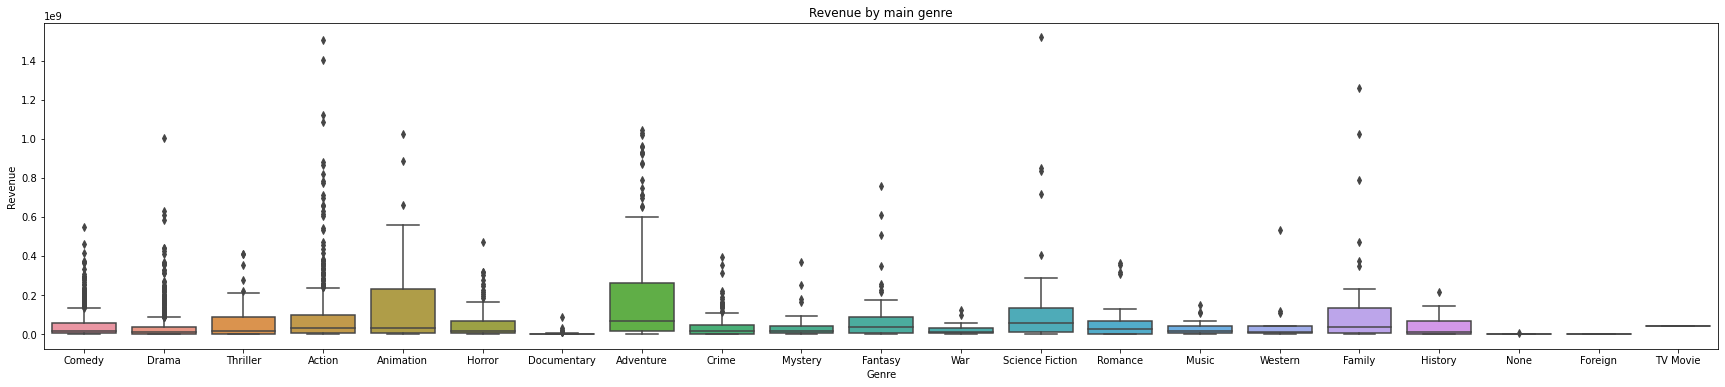

In [711]:
plt.figure(figsize=(30, 6))
sns.boxplot(x='main_genre',y='revenue',data=df)

plt.xlabel('Genre')
plt.ylabel('Revenue')
plt.title('Revenue by main genre')
plt.show()

In [712]:
#Average revenue by main genre
genre_avg_rev = df.groupby('main_genre')['revenue'].mean()
genre_avg_rev

main_genre
Action             9.359660e+07
Adventure          1.877155e+08
Animation          1.480897e+08
Comedy             4.775484e+07
Crime              4.082005e+07
Documentary        3.538250e+06
Drama              3.729875e+07
Family             1.573475e+08
Fantasy            8.234511e+07
Foreign            1.406500e+05
History            4.423782e+07
Horror             4.958685e+07
Music              3.389038e+07
Mystery            4.767484e+07
None               1.110844e+06
Romance            5.164857e+07
Science Fiction    1.638338e+08
TV Movie           4.200000e+07
Thriller           5.657442e+07
War                2.438851e+07
Western            6.490571e+07
Name: revenue, dtype: float64

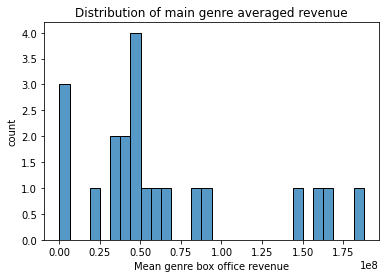

In [713]:
sns.histplot(x=genre_avg_rev,bins=30)
plt.title('Distribution of main genre averaged revenue')
plt.xlabel('Mean genre box office revenue')
plt.ylabel('count')
plt.show()

We can see that the revenue distributions of films by main genre differ.

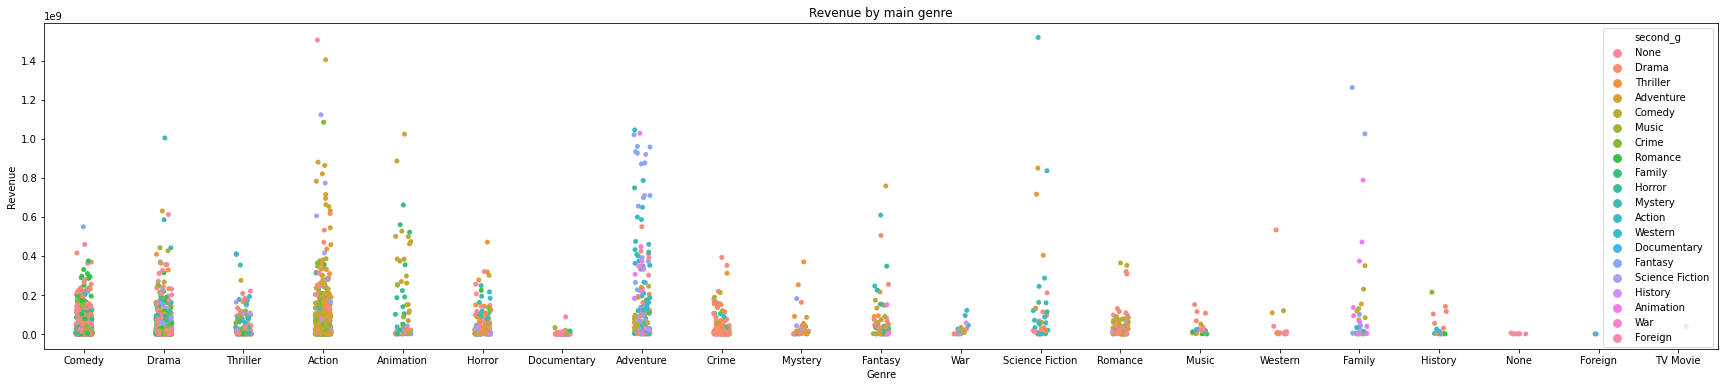

In [714]:
plt.figure(figsize=(30, 6))
sns.stripplot(x='main_genre',y='revenue',hue='second_g',data=df)

plt.xlabel('Genre')
plt.ylabel('Revenue')

plt.title('Revenue by main genre')
plt.show()

We don't see the secondary genre having a marked affect – let's examine some of the most common main genres individually.

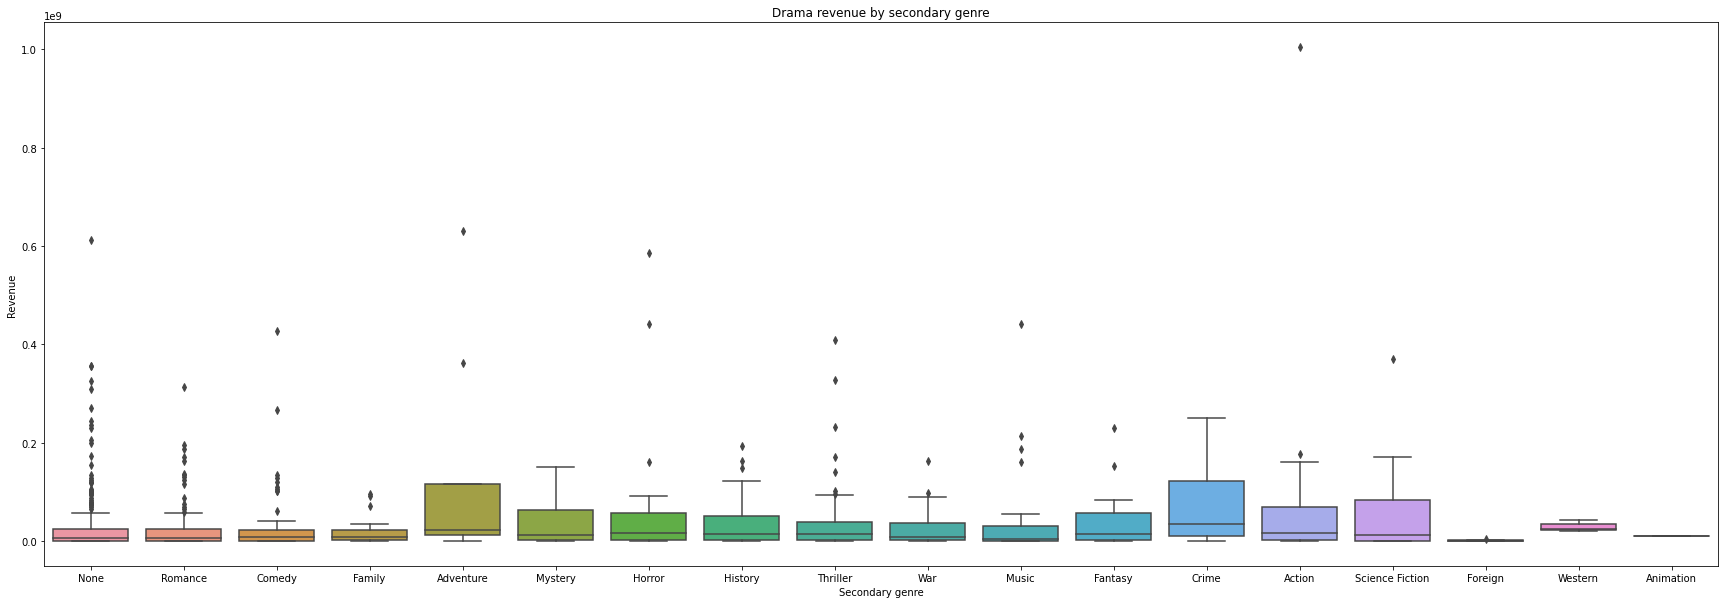

In [715]:
dramas = df[df['main_genre']=='Drama']

plt.figure(figsize=(30, 10))
sns.boxplot(x='second_g',y='revenue',data=dramas)

plt.xlabel('Secondary genre')
plt.ylabel('Revenue')

plt.title('Drama revenue by secondary genre')
plt.show()

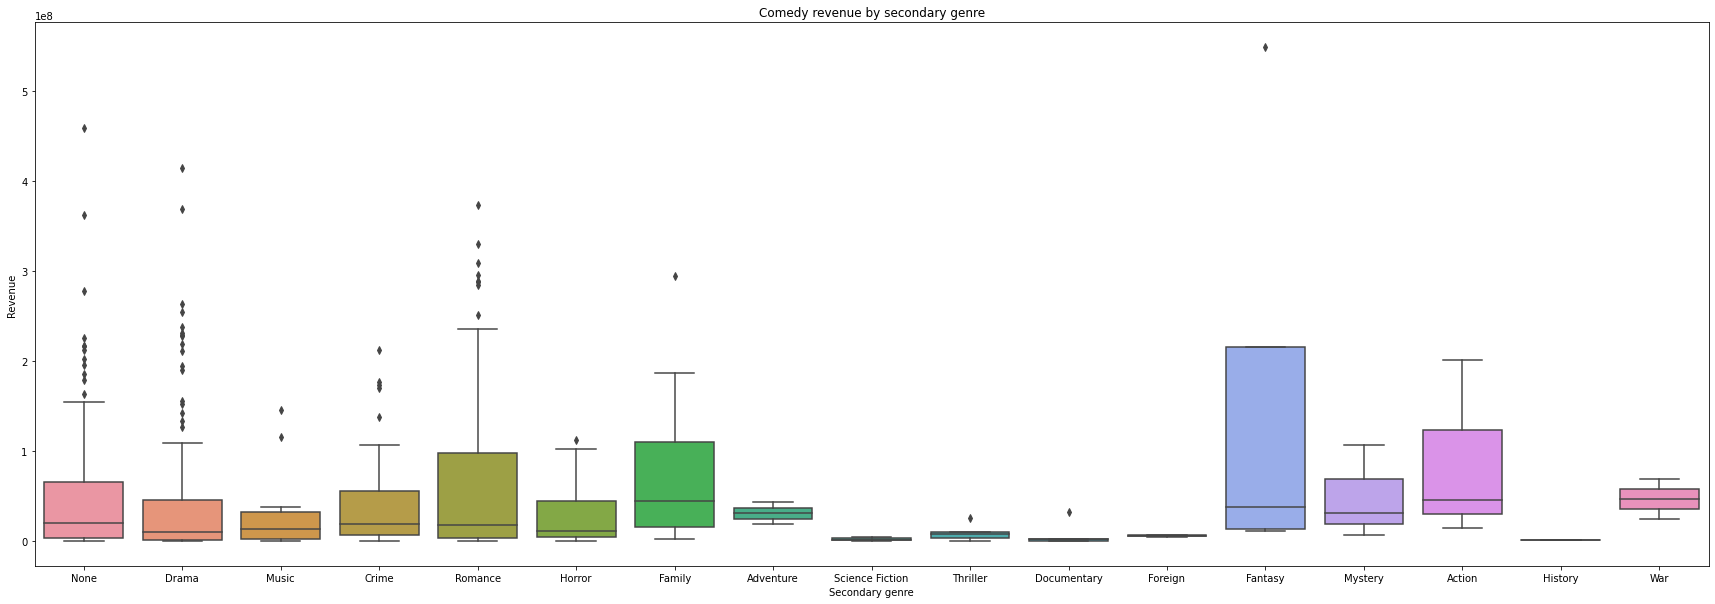

In [716]:
comedy = df[df['main_genre']=='Comedy']

plt.figure(figsize=(30, 10))
sns.boxplot(x='second_g',y='revenue',data=comedy)

plt.xlabel('Secondary genre')
plt.ylabel('Revenue')

plt.title('Comedy revenue by secondary genre')
plt.show()

Within a main genre category we see the potential for secondary genre to affect revenue.

In [717]:
#keywords

df['Keywords']

df['keywords'] = pd.Series(dtype='object')
j = 0
for i in df['Keywords']:
    d = get_dictionary(i)
    if d != {}:
        df['keywords'].iloc[j] = [d[x]['name'] for x in range(0,len(d))]

    else:
         df['keywords'].iloc[j] = np.NaN
    j += 1

df.drop(labels=['Keywords'],axis=1,inplace=True)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [718]:
print(df['keywords'][3:8])
print(df['keywords'].isna().sum())

3    [mystery, bollywood, police corruption, crime,...
4                                                  NaN
5                                                  NaN
6                                                  NaN
7    [journalism, translation, television, manipula...
Name: keywords, dtype: object
276


Keyword information, like our remaining information about cast and crew (specific cast & crew names and demographic information), seems too specific to be of particular use for our modeling.

In [719]:

df.drop(labels = ['cast','crew','keywords','pro_co'],axis =1, inplace=True)

We'll make a correlation matrix to visualize the most significant numerical correlations

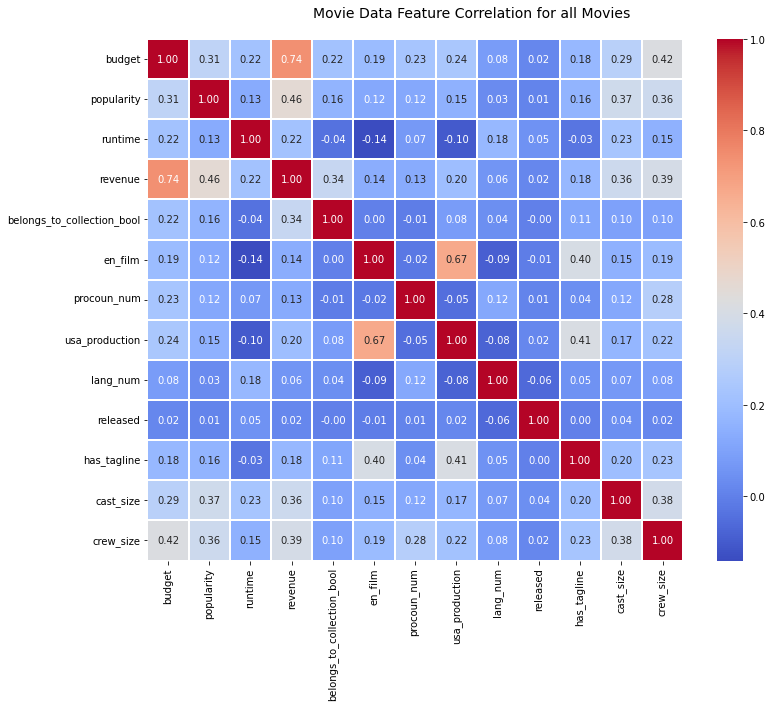

In [720]:
df_num = df[['budget', 'popularity', 'runtime','revenue','release_date','belongs_to_collection_bool','en_film','procoun_num','usa_production','lang_num','released','has_tagline','cast_size','crew_size']].copy()

#correlation matrix 
corrmat = df_num.corr()
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(round(corrmat,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Movie Data Feature Correlation for all Movies', fontsize=14)

According to our correlation matrix, budget and popularity have the largest correlations with revenue. Cast and crew size also have modest but not particularly strong correlations with revenue.

We'll create pairplots for all numeric correlations to further visualize this:

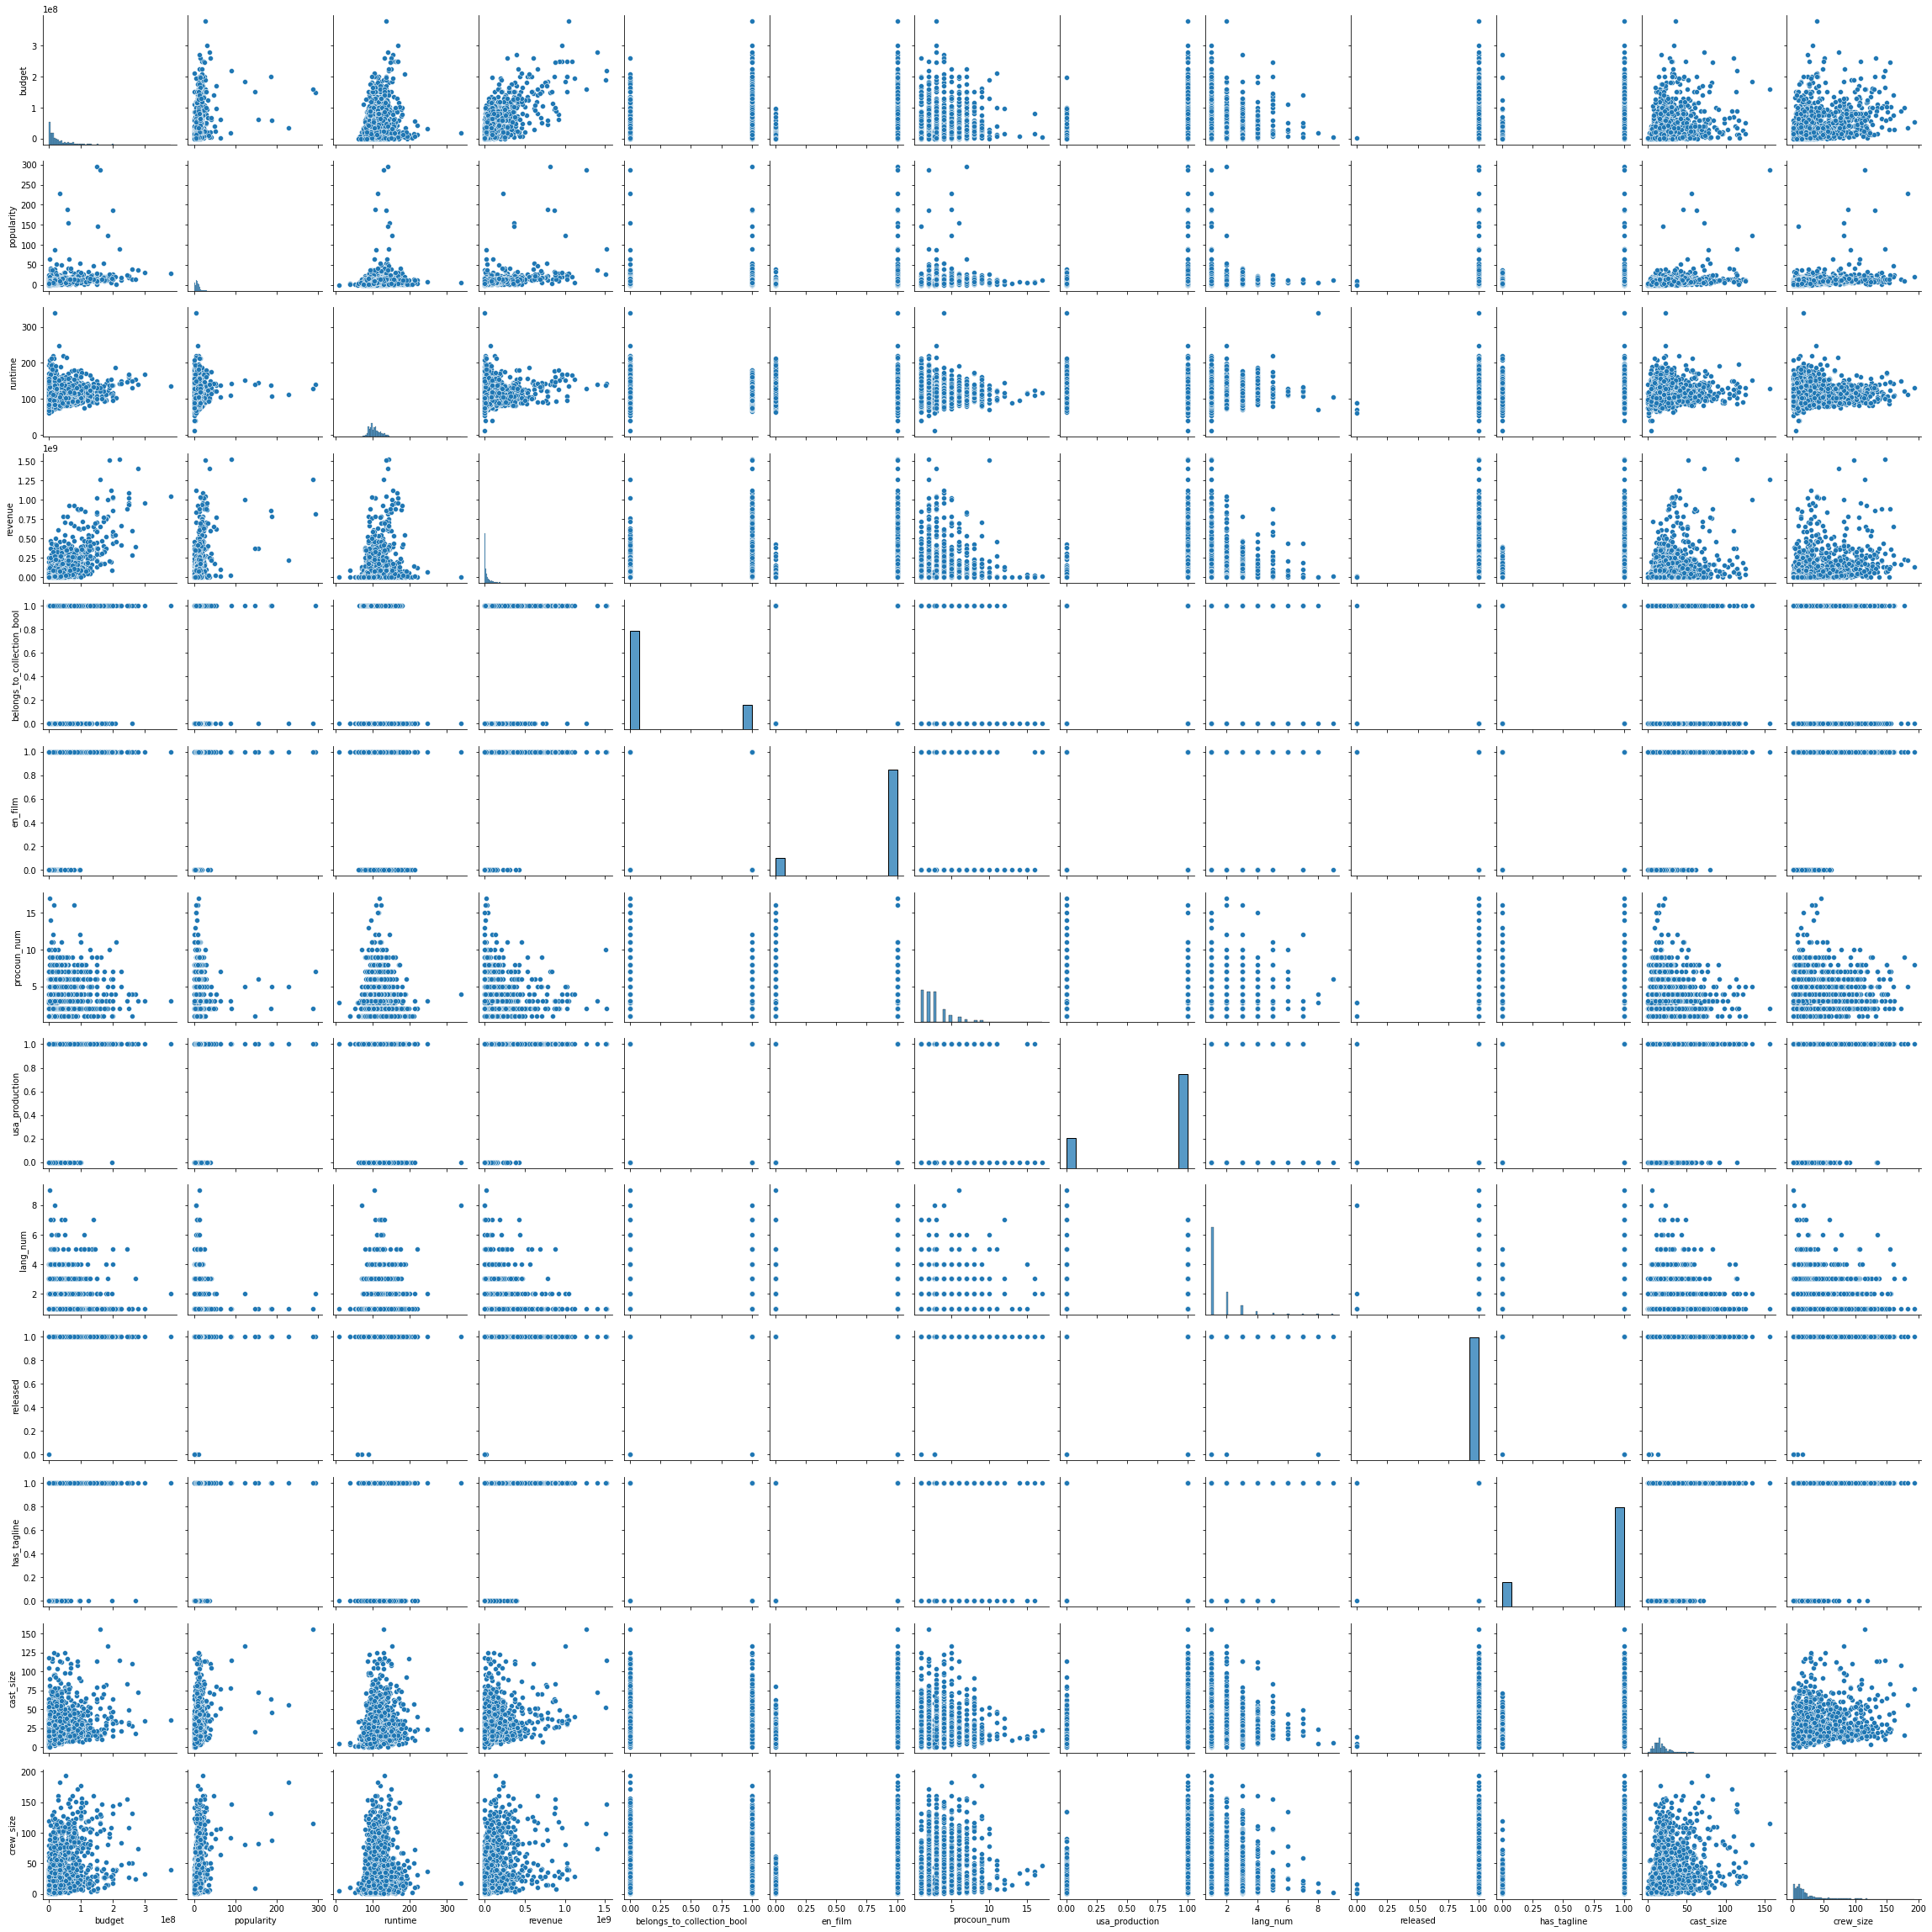

In [721]:
sns.pairplot(df_num,  palette='Set1')
plt.show()

We further examined the data for a relationship between genres and revenue – no simple correlation was immediately visible, but both main and secondary genres seem like promising features for modeling. We found correlations between several numerical factors and revenue: popularity, budget, and to a lesser extent, crew and cast size. We will try to investigate these features further in subsequent modeling to see how they relate to one another and further investigate their relationship with our target feature: revenue.

The boolean features we created to track the presence of a variety of categorical data during the data wrangling stage do not appear to have a strong relationship with revenue at this point.